In [53]:
import numpy as np
from copy import deepcopy
from google.colab import files
from cv2 import imread
from matplotlib.pyplot import imshow

In [13]:
img=files.upload()

Saving plane.bmp to plane.bmp


In [14]:
image=imread("plane.bmp")

In [46]:
def diff_x(image):
  I_x=deepcopy(image)
  m,n=image.shape
  for i in range(m-1):
    for j in range(n):
      I_x[i,j]=image[i+1,j]-image[i,j]
  return I_x

def diff_y(image):
  I_y=deepcopy(image)
  m,n=image.shape
  for i in range(m):
    for j in range(n-1):
      I_y[i,j]=image[i,j+1]-image[i,j]
  return I_y

def convol(image,filter):
  G=np.zeros((2,2))
  m,n=filter.shape
  for i in range(m):
    for j in range(n):
      G+=filter[i,j]*image
  return G
def harris_corner(image,k=0.05):
  image=np.dot(image,np.array([0.3,0.59,0.11]))
  gaussian=np.array([[1,2,1],[2,4,2],[1,2,1]])
  m,n=image.shape
  I_x=diff_x(image)
  I_y=diff_y(image)
  M,A=np.zeros((m,n)),np.zeros((2,2))
  for i in range(m):
    for j in range(n):
      A[0,0]=I_x[i,j]**2
      A[0,1]=I_x[i,j]*I_y[i,j]
      A[1,0]=I_x[i,j]*I_y[i,j]
      A[1,1]=I_y[i,j]**2
      conv=convol(A,gaussian)
      M[i,j]=(conv[0,0]*conv[1,1]-conv[0,1]*conv[1,0])-k*(conv[0,0]+conv[1,1])
  mean=np.mean(M)
  minimum=np.min(M)
  M=np.where(M<mean,minimum,0)
  return M

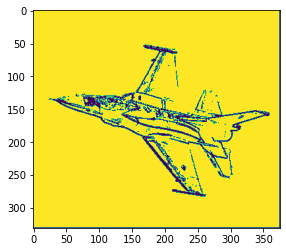

In [56]:
imshow(harris_corner(image))